In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data = pd.read_csv("iris.data", header=None, names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'Targets'])
df = pd.DataFrame(data)
df.head(5)


,sepal_length,sepal_width,petal_length,petal_width,Targets
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


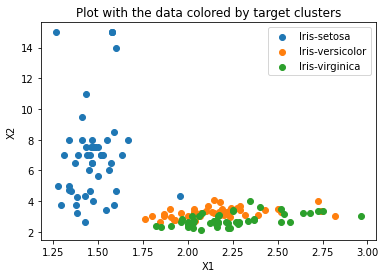

In [3]:
'''

Q1. Create a new data set with two features by computing the ratio of raw features x = (x1, x2) where x1
= (sepal length/sepal width) and x2 = (petal length/petal width)) and plot the data to observe the
clusters in data by yourself (use class label to color the data points for better illustration of clusters).

'''
df['X1'] = df['sepal_length']/df['sepal_width']
df['X2'] = df['petal_length']/df['petal_width']

y = df['Targets'].replace(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'],[0,1,2])
y = np.array(y, dtype=np.int8)
X1 = np.array(df['X1'], dtype=np.float64)
X2 = np.array(df['X2'], dtype=np.float64)
X = np.array(df[['X1','X2']], dtype=np.float64)

groups = df.groupby('Targets')
for name, group in groups:
    plt.scatter(group.X1, group.X2, label=name)
    
plt.title("Plot with the data colored by target clusters")
plt.xlabel('X1') 
plt.ylabel('X2')
plt.legend()
plt.show()


In [4]:
'''

Q2. Implement the k-means++ algorithm. Submit the source code (documented!) of your implementation

'''

import random
from sklearn.metrics import accuracy_score

def euclidean_dist(x1,y1,x2,y2):
    return np.sqrt((x1-x2)**2 + (y1-y2)**2)

#Function for Smart Initializing centroids using K-means ++ algorithm. 
#Takes the data(x = feature1 (X1 in this case), y = feature2 (X2 in this case)) and number of clusters as input
#Outputs the centroids selected for initialization of K-means

def initialize_kmeans(x,y,k):
    c=[]
    
    # Choose a random point from the dataset
    
    r=random.randrange(len(x))
    random_point=[]
    random_point.append(x[r])
    random_point.append(y[r])
    c.append(random_point)
    
    for i in range(k-1):
        index = 0
        maximum = 0
        point=[]
        
        # Identify the farthest point (index) from the selected centroids
        # 1. Calculate Euclidean distance of all points from the nearest selected centroids.
        # 2. Select the point with the maximum (farthest) euclidean distance.  
        for j in range(len(x)):
            dist=[]
            for l in range(len(c)):
                dist.append(euclidean_dist(x[j],y[j],c[l][0],c[l][1]))
            min_dist = min(dist)
            if (min_dist>maximum):
                maximum = min_dist
                index = j
        point.append(x[index])
        point.append(y[index])
        c.append(point)
    return c

#Function to update centroids. I takes the data (points), old centroids and number of clusters as input
#and returns intermediate labels, clustered points and the updated centroids.

def calculate_next_centroids(x,y,old_centroids,k):
    
    #Cluster the points to its nearest centroid
    
    nearest_centroid=[]
    for i in range(len(x)):
        dist=[]
        for j in range(len(old_centroids)):
            dist.append(euclidean_dist(x[i],y[i],old_centroids[j][0],old_centroids[j][1]))
        dist = np.array(dist, dtype=np.float64)
        nearest_centroid.append(np.argmin(dist)) 
        
    nearest_centroid = np.array(nearest_centroid, dtype=np.int8)
    
    #Based on above clusters, compute the centroids of the points that belong to a cluster.
    #This will act as new centroids for our clustering.
    
    next_centroids=[]
    cluster=[]
    for i in range(k):
        cluster_x=[]
        cluster_y=[]
        cluster_x_y=[]
        cluster_centroid=[]
        for j in range(len(x)):
            if(nearest_centroid[j]==i):
                cluster_x.append(x[j])
                cluster_y.append(y[j])
        
        cluster_x_y.append(cluster_x)
        cluster_x_y.append(cluster_y)
        cluster.append(cluster_x_y)
        
        cluster_centroid.append(np.mean(cluster_x)) 
        cluster_centroid.append(np.mean(cluster_y))
        next_centroids.append(cluster_centroid)
    
    return nearest_centroid, cluster, next_centroids

def kmeans_plus_plus(x,y,targets,k):
    centroids = initialize_kmeans(x, y, k)
    delta_max = []
    
    for j in range(50):
        
        #old_centroids
        old_centroids=centroids
        
        #update centroids
        labels, cluster, centroids = calculate_next_centroids(x, y, centroids, k)
        
        #new_centroids
        new_centroids=centroids
    
        delta=[]
        for i in range(len(centroids)):
            #Calculate the Within the cluster Square Sum to compare 
            wss = (np.mean((cluster[i][0] - np.mean(cluster[i][0]))**2) + np.mean((cluster[i][1] - np.mean(cluster[i][1]))**2))/2
            
            #Calculate the 
            delta.append(wss)
            
        delta_max.append(np.mean(delta))
        
    return cluster, centroids, delta_max, wss



Cluster Objective for K = 1,2,3,4,5
[3.570762287189612, 2.256796000831279, 0.24250524942287904, 0.27577953144304784, 0.19061585241368936]


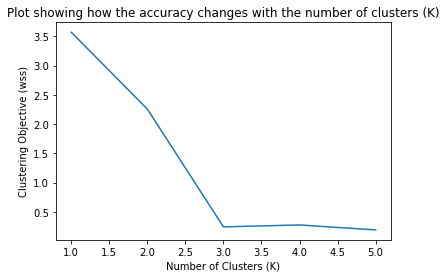

In [5]:
'''

Q3. Cluster the modified Iris dataset with the two features explained above. Run your algorithm 50 times
over the data with different values of clusters k = 1, 2, . . . , 5 and plot the accuracies (x and y axes
should be the number of clusters and the clustering objective.


'''
# For K=1
#print("For K=1")

cl,ct,de,cluster_obj1 = kmeans_plus_plus(X1,X2,y,1)

#for i in range(len(ct)):
#    plt.scatter(cl[i][0],cl[i][1])
#    plt.scatter(ct[i][0],ct[i][1])
#plt.show()

#plt.plot(range(50),de)
#plt.show()

# For K=2

#print("For K=2")
cl,ct,de,cluster_obj2 = kmeans_plus_plus(X1,X2,y,2)

#for i in range(len(ct)):
#    plt.scatter(cl[i][0],cl[i][1])
#    plt.scatter(ct[i][0],ct[i][1])
#plt.show()

#plt.plot(range(50),de)
#plt.show()


# For K=3

#print("For K=3")
cl,ct,de,cluster_obj3 = kmeans_plus_plus(X1,X2,y,3)

#for i in range(len(ct)):
#    plt.scatter(cl[i][0],cl[i][1])
#    plt.scatter(ct[i][0],ct[i][1])
#plt.show()

#plt.plot(range(50),de)
#plt.show()

#print("For K=4")

cl,ct,de,cluster_obj4 = kmeans_plus_plus(X1,X2,y,4)

#for i in range(len(ct)):
#    plt.scatter(cl[i][0],cl[i][1])
#    plt.scatter(ct[i][0],ct[i][1])
#plt.show()

#plt.plot(range(50),de)
#plt.show()

#print("For K=5")

cl,ct,de,cluster_obj5 = kmeans_plus_plus(X1,X2,y,5)

#for i in range(len(ct)):
#    plt.scatter(cl[i][0],cl[i][1])
#    plt.scatter(ct[i][0],ct[i][1])
#plt.show()

#plt.plot(range(50),de)
#plt.show()


print("Cluster Objective for K = 1,2,3,4,5")
print([cluster_obj1,cluster_obj2,cluster_obj3,cluster_obj4,cluster_obj5])

plt.plot(range(1,6),[cluster_obj1,cluster_obj2,cluster_obj3,cluster_obj4,cluster_obj5])
plt.title("Plot showing how the accuracy changes with the number of clusters (K)")
plt.xlabel('Number of Clusters (K)') 
plt.ylabel('Clustering Objective (wss)')
plt.show()

For K=3


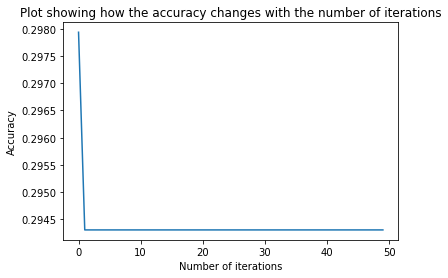

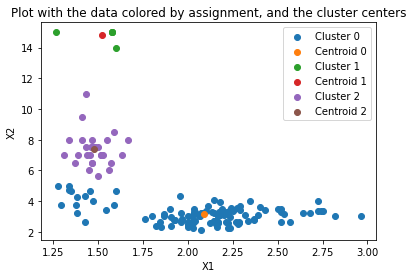

In [6]:
'''

Based on the above plot, decide the number of final clusters and justify your answer. For the chosen
number of clusters,
• Create a plot showing how the accuracy changes with the number of iterations.
• Create a plot with the data colored by assignment, and the cluster centers.

'''
# According to the above plot, the clustering objective for 1 depicts underfitting and clustering objective 
# for 5 depicts overfitting as there are some unwanted clusters.
# The optimal values is for 2 clusters where the clustering objective graph depicts optimal clustering

print("For K=3")
cl,ct,de,cluster_obj3 = kmeans_plus_plus(X1,X2,y,3)

plt.plot(range(50),de)
plt.title("Plot showing how the accuracy changes with the number of iterations")
plt.xlabel('Number of iterations') 
plt.ylabel('Accuracy')
plt.show()

for i in range(len(ct)):
    plt.scatter(cl[i][0],cl[i][1], label="Cluster "+str(i))
    plt.scatter(ct[i][0],ct[i][1], label="Centroid "+str(i))

plt.title("Plot with the data colored by assignment, and the cluster centers")
plt.xlabel('X1') 
plt.ylabel('X2')
plt.legend()
plt.show()

